# Hands-on Lab: Sub-queries and Nested Selects

### Objectives
After completing this lab, you will be able to:

- Write SQL queries that demonstrate the necessity of using sub-queries
- Compose sub-queries in the where clause
- Build column expressions (for example, sub-query in place of a column)
- Write table expressions (for example, sub-query in place of a table)
### Software Used in this Lab
In this lab, you will use MySQL. MySQL is a Relational Database Management System (RDBMS) designed to store, manipulate, and retrieve data efficiently.

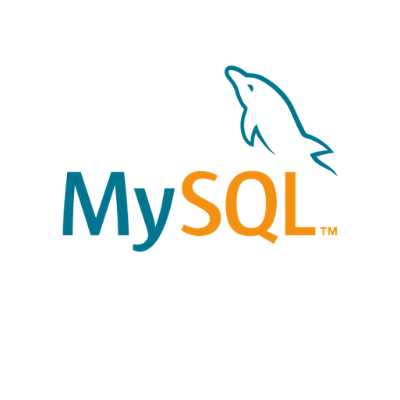

To complete this lab, you will use MySQL relational database service available as part of IBM Skills Network Labs (SN Labs) Cloud IDE. SN Labs is a virtual lab environment used in this course.

### Database Used in this Lab
The database used in this lab is internal. You will be working on a sample HR database. This HR database schema consists of 5 tables: **EMPLOYEES, JOB_HISTORY, JOBS, DEPARTMENTS,** and **LOCATIONS**. Each table has a few rows of sample data. The following diagram shows the tables for the HR database:

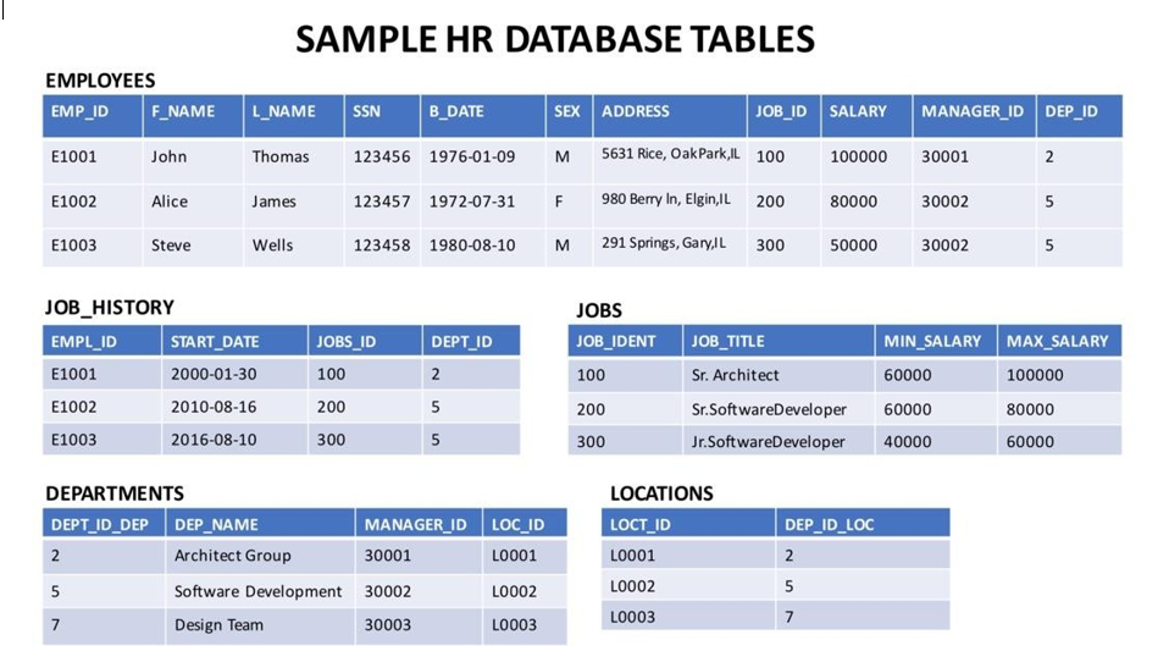

### Load the database
Using the skills acquired in the previous modules, you should first create the database in MySQL. Follow the steps below.

1. Open the phpMyAdmin interface from the Skills Network Toolbox in Cloud IDE.
2. Create a blank database named 'HR'. Use the script shared in the link below to create the required tables.
    [Script_Create_Tables.sql](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%202/scripts/Script_Create_Tables.sql)

3. Download the files in the links below to your local device (if not already done in previous labs)
    [Departments.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%202/data/Departments.csv)<br>
    [Jobs.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%202/data/Jobs.csv)<br>
    [JobsHistory.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%202/data/JobsHistory.csv)<br>
    [Locations.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%202/data/Locations.csv)<br>
    [Employees.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%202/data/Employees.csv)

4. Use these files in the phpMyAdmin interface as the data for the respective tables in the 'HR' database.

### Sub-queries and Nested Selects
Say you are asked to retrieve all employee records whose salary is lower than the average salary. You might use the following query to do this.<br>
   `Query:` SELECT * 
FROM EMPLOYEES 
WHERE salary < AVG(salary);

However, this query will generate an error stating, "Illegal use of group function." Here, the group function is `AVG` and cannot be used directly in the condition since it has not been retrieved from the data. Therefore, the condition will use a sub-query to retrieve the average salary information to compare the existing salary. The modified query would become:<br>
    `Query:` SELECT *
FROM EMPLOYEES
WHERE SALARY < (SELECT AVG(SALARY) FROM EMPLOYEES);

Now, consider executing a query that retrieves all employee records with EMP_ID, SALARY, and maximum salary as MAX_SALARY in every row. For this, the maximum salary must be queried and used as one of the columns. This can be done using the query below.<br>
    `Query:` SELECT EMP_ID, SALARY, (SELECT MAX(SALARY) FROM EMPLOYEES) AS MAX_SALARY 
FROM EMPLOYEES;

Now, consider that you wish to extract the first and last names of the oldest employee. Since the oldest employee will be the one with the smallest date of birth, the query can be written as:<br>
    `Query:` SELECT F_NAME, L_NAME
FROM EMPLOYEES
WHERE B_DATE = (SELECT MIN(B_DATE) FROM EMPLOYEES);

You may also use sub-queries to create derived tables, which can then be used to query specific information. Say you want to know the average salary of the top 5 earners in the company. You will first have to extract a table of the top five salaries as a table. From that table, you can query the average value of the salary. The query can be written as follows.<br>
    `Query:` SELECT AVG(SALARY) 
FROM (SELECT SALARY 
      FROM EMPLOYEES 
      ORDER BY SALARY DESC 
      LIMIT 5) AS SALARY_TABLE;


Note that it is necessary to give an alias to any derived tables.

### Practice Problems
1. Write a query to find the average salary of the five least-earning employees.<br>
    `Query:` SELECT AVG(SALARY) 
FROM (SELECT SALARY 
      FROM EMPLOYEES 
      ORDER BY SALARY 
      LIMIT 5) AS SALARY_TABLE;

2. Write a query to find the records of employees older than the average age of all employees.<br>
   `Query:` SELECT * 
FROM EMPLOYEES 
WHERE YEAR(FROM_DAYS(DATEDIFF(CURRENT_DATE,B_DATE))) > 
    (SELECT AVG(YEAR(FROM_DAYS(DATEDIFF(CURRENT_DATE,B_DATE)))) 
    FROM EMPLOYEES);
3. From the Job_History table, display the list of Employee IDs, years of service, and average years of service for all entries.<br>
   `Query:` SELECT EMPL_ID, YEAR(FROM_DAYS(DATEDIFF(CURRENT_DATE, START_DATE))), 
    (SELECT AVG(YEAR(FROM_DAYS(DATEDIFF(CURRENT_DATE, START_DATE)))) 
    FROM JOB_HISTORY)
FROM JOB_HISTORY;